<a href="https://colab.research.google.com/github/drajaysingh9/datasciencecoursera/blob/main/%5BBSE%5D_AssumptionTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#!pip install statsmodels==0.12

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# **Air Passenger Dataset**

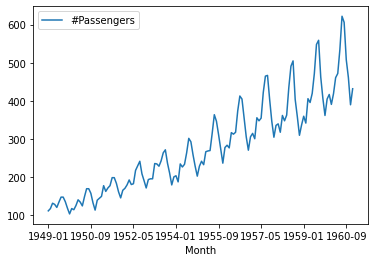

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jyotie02/BSE_TimeSeries/main/AirPassengers.csv', header=0, index_col=0)
df.plot()

In [ ]:
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


# **Stationarity check**

In [ ]:
X = df.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


**ADF test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Result : Series is Non Stationary

In [ ]:
diff=[]

data=df.values 

for i in range(1,len(data)):
  diff.append(data[i]- data[i-1])

Diff=np.asarray(diff)

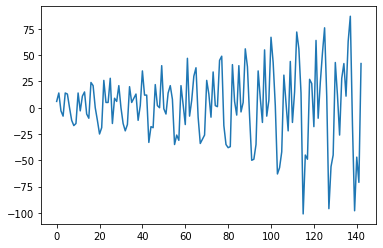

In [ ]:
plt.plot(Diff)

In [ ]:

result = adfuller(Diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


TEST STATISTIC < CRITICAL VALUE(10%) --> DATA IS 90% SURELY STATIONARY

### **ACF and PACF plot**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

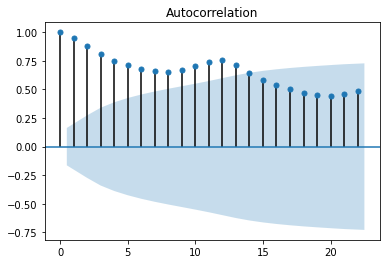

In [ ]:
plot_acf(df.values)
plt.show()

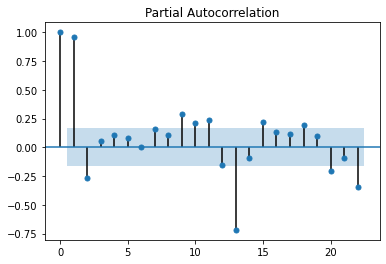

In [ ]:

plot_pacf(df.values)
plt.show()

### **ARIMA**

In [ ]:
model_air = ARIMA(df.values , order=(1,1,1))
model_fit_air = model_air.fit()

In [ ]:
pred_air = model_fit_air.predict(start=0, end=len(df.values)-1, dynamic=False)

In [ ]:
df['pred_arima']=pred_air

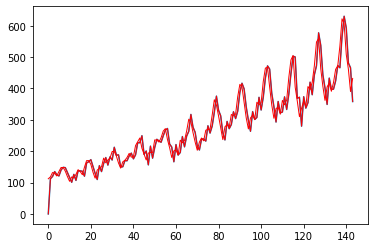

In [ ]:
plt.plot(pred_air)
plt.plot(df.values, color='red', linewidth=1)

In [ ]:
print(model_fit_air.arparams)

[-0.47419591]


In [ ]:
print(model_fit_air.maparams)

[0.86349641]


In [ ]:
print(model_fit_air.mse)

1042.9304613222878


*   Error is high because of the Seasonality
*   So, We move to SARIMA model


### **SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarima = SARIMAX(df['#Passengers'].values ,order = (1,1,1),seasonal_order = (1,1,2,12))
results_sarima = model_sarima.fit()

In [ ]:
pred_sarima = results_sarima.predict(start=0, end=len(df.values)-1, dynamic=False)

In [ ]:
df['pred_sarima']=pred_sarima

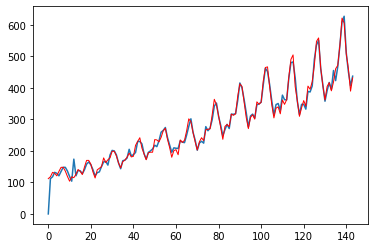

In [ ]:
plt.plot(pred_sarima)
plt.plot(df['#Passengers'].values, color='red', linewidth=1)

In [ ]:
print(results_sarima.mse)

231.0818927940408


## **Assumption Testing**

## **Linearity**

we can do this by using a scatter plot to see our predicted values versus the actual values.

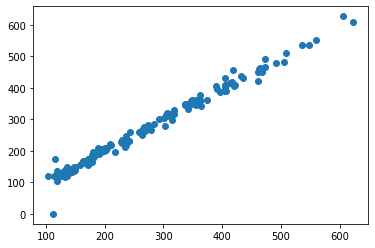

In [ ]:
# Plotting the observed vs predicted values
plt.scatter(df['#Passengers'].values,pred_sarima)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


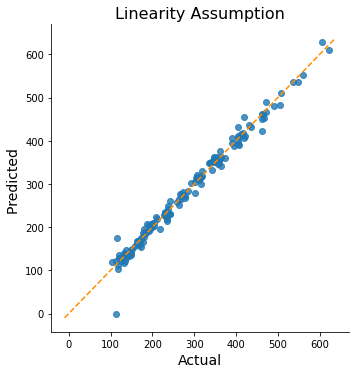

In [ ]:
# Plotting the observed vs predicted values
sns.lmplot(x='#Passengers', y='pred_sarima', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['#Passengers', 'pred_sarima']].min().min()-10, 
                        df[['#Passengers', 'pred_sarima']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted ', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship.

## **Normality**

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 9.372715354870958e-10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


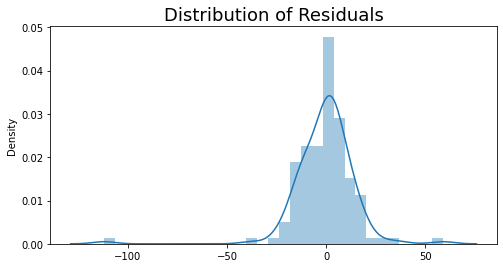

Residuals are not normally distributed


In [ ]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad((pred_sarima-df['#Passengers'].values))[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot((pred_sarima-df['#Passengers'].values))
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

## **Autocorrelation**

### **Ljung Box Testing**

**Air Passenger**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
acorr_ljungbox(df['#Passengers'].values, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,132.141539,1.393231e-30


Here we see a p-value much smaller than .01, thus we can reject the null hypothesis, indicating the time series does contain an autocorrelation.

**Prediction using ARIMA**

In [ ]:
acorr_ljungbox((pred_air-df['#Passengers'].values), lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,0.21089,0.646071


We don't have enough statistical evidence to reject the null hypothesis.	The data are random.

**Prediction using SARIMA**

In [ ]:
acorr_ljungbox((pred_sarima-df['#Passengers'].values), lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,5.243020e-07,0.999422


We don't have enough statistical evidence to reject the null hypothesis.	The data are random.

### **Durbin-Watson score**

* If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
* If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
* If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson((pred_sarima-df['#Passengers'].values))

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6226921359322988
Little to no autocorrelation 

Assumption satisfied


## **Homoscedasticity**

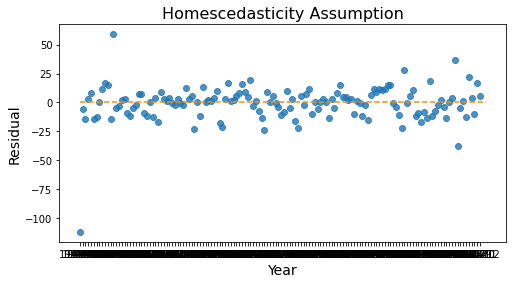

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=(pred_sarima-df['#Passengers'].values), alpha=0.8)
plt.plot(np.repeat(0, len(df.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

Our residual seems to have constant and uniform variance, so **we can assume that it satisfied the homoscedasticity assumption.**